In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium
import seaborn as sns

In [3]:
london_crime = pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
#london map
mel_map = folium.Map(location = [51.5072, 0.1278], zoom_start=11)
mel_map

In [12]:
#mencari time range
print(london_crime['year'].max())
print(london_crime['year'].min())

2016
2008


In [25]:
#mencari value kejahatan terbanyak
lcrime=london_crime.sort_values('value',ascending=False)
lcrime.head(40)

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
9579977,E01004734,Westminster,Theft and Handling,Other Theft,281,2009,1
11201180,E01004734,Westminster,Theft and Handling,Other Theft,280,2009,12
2932492,E01033595,Westminster,Theft and Handling,Other Theft,280,2011,12
7942318,E01004734,Westminster,Theft and Handling,Other Theft,267,2008,7
12914969,E01004734,Westminster,Theft and Handling,Other Theft,262,2009,11
9164301,E01004734,Westminster,Theft and Handling,Other Theft,260,2009,3


In [ ]:
#dari data diatas diektahui bahwa di Westminster banyak terjadi crime khususnya category Theft and Handling

In [16]:
wer = london_crime[(london_crime["borough"]=='Westminster')& (london_crime["major_category"]=='Theft and Handling')]
wer_crime = wer[['value', 'year']].groupby(['year']).sum()
wer_crime

,value
year,
2008,29266
2009,29967
2010,29191
2011,33529
2012,38152
2013,33868
2014,28144
2015,27980
2016,27520


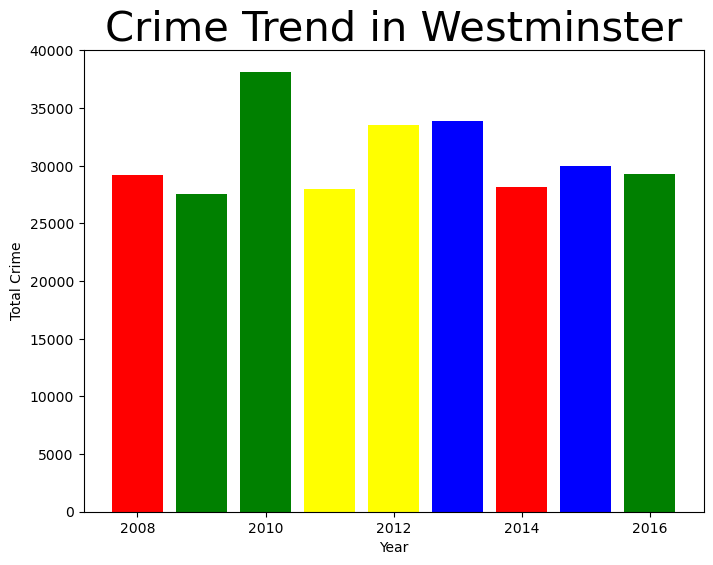

In [17]:
#visualisasi crime di Westminster dari tahun ke tahun khususnya category Theft and Handling
x=london_crime['year'].unique().tolist()
y=wer_crime['value']
plt.figure(figsize=(8,6))
plt.bar(x,y,color=['green', 'blue', 'red', 'yellow'])
plt.title('Crime Trend in Westminster', size=30)
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.show()

In [24]:
#Ada penurunan besar dari tahun 2010 ke 2011 

In [39]:
#karena tidak ada penurunan secara general maka persempit pencarian dengan minor category
werminor=wer[wer['minor_category']=='Other Theft']
werminor_year=werminor[['value', 'year']].groupby(['year']).sum()
werminor_year

,value
year,
2008,16501
2009,16045
2010,15906
2011,17872
2012,19556
2013,16620
2014,13790
2015,13570
2016,12172


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


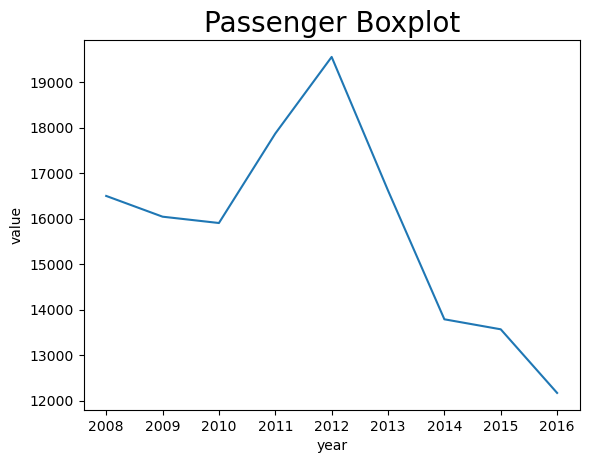

In [50]:
#visualisasi crime di Westminster dari tahun ke tahun khususnya category Theft and Handling and Minor category Other theft
sns.lineplot(data=werminor_year, x="year", y="value")
plt.title('Passenger Boxplot', size=20)
plt.show()

In [ ]:
#conclusion: terdapat penurunan sejak tahun 2012 untuk catogery major dan minor theft di Westminster

In [9]:
#mencari borough lain dengan jumlah crime tinggi selain Westminster
daerah_lain=london_crime[london_crime['borough']!='Westminster']
daerah_lain_urut=daerah_lain.sort_values('value',ascending=False)
daerah_lain_urut.head(20)

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
9291860,E01001758,Hackney,Drugs,Drug Trafficking,211,2011,9
8020437,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,184,2013,7
7415415,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,179,2011,7
10648026,E01002002,Haringey,Theft and Handling,Other Theft Person,159,2013,6
6489454,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,158,2010,8
3467125,E01002724,Islington,Drugs,Possession Of Drugs,158,2008,2
10335149,E01003061,Lambeth,Theft and Handling,Other Theft Person,156,2012,12
6819650,E01001966,Haringey,Theft and Handling,Other Theft Person,155,2011,11
7260937,E01001786,Hackney,Drugs,Possession Of Drugs,153,2012,6


In [17]:
#salah satu yang terlihat mencolok adalah Drugs di Tower Hamlets 
#mencari berapa percent kejahatan drugs dari seluruh kejahatan yang ada di Tower Hamlets
th=london_crime[london_crime['borough']=='Tower Hamlets']
pie=th[['value', 'major_category']].groupby(['major_category'], as_index=False).sum()
pie

,major_category,value
0,Burglary,21510
1,Criminal Damage,21593
2,Drugs,23408
3,Fraud or Forgery,124
4,Other Notifiable Offences,4268
5,Robbery,10050
6,Sexual Offences,47
7,Theft and Handling,87620
8,Violence Against the Person,59993


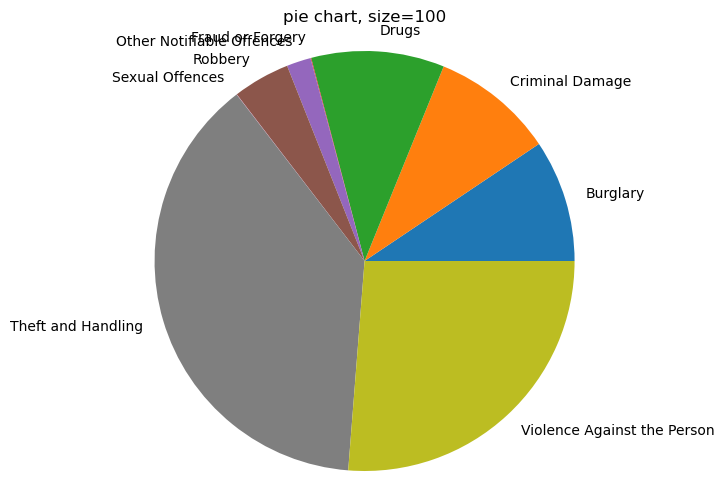

In [20]:
plt.figure(figsize=(8,6))
plt.pie(pie['value'], labels=pie['major_category'])
plt.axis('equal')
plt.title('pie chart, size=100')
plt.show()

In [ ]:
#Theft and Handling is the largest crime happened in Tower Hamlets
#krg histogram boxplot 

In [24]:
#mencari visualisa jumlah kejadian major category drugs and theft & handling di 2016 pada setiap bulannya
eb=london_crime[(london_crime['major_category']=="Drugs")|(london_crime["major_category"]=='Theft and Handling')|(london_crime["year"]==2016)]
eb.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


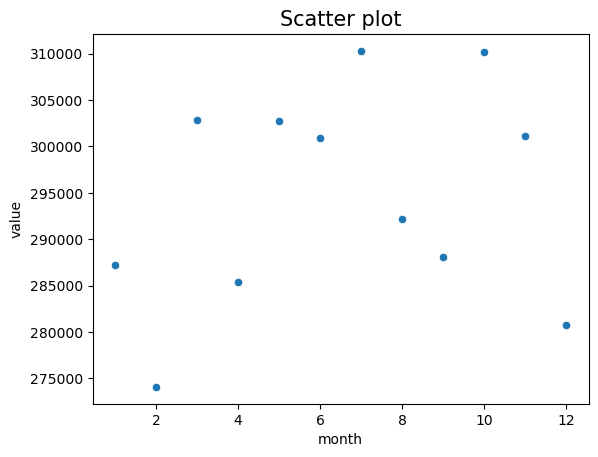

In [29]:
scp=eb[['value', 'month']].groupby(['month'], as_index=False).sum()
sns.scatterplot(data=scp, x='month', y='value')
plt.title('Scatter plot', size=15)
plt.show()

In [27]:
#bulan Juni dan November menempati posisi teringgi untuk jumlah major crime drugs and theft & handling pada 2016

In [ ]:
#mencari frekuensi crime value untuk major crime drugs and theft & handling pada 2016 yang dibawah 20

In [36]:
ebc=eb[eb['value']<20]
ebc

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
...,...,...,...,...,...,...,...
13490591,E01000193,Barnet,Criminal Damage,Other Criminal Damage,0,2016,2
13490593,E01004531,Wandsworth,Theft and Handling,Handling Stolen Goods,0,2014,12
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10


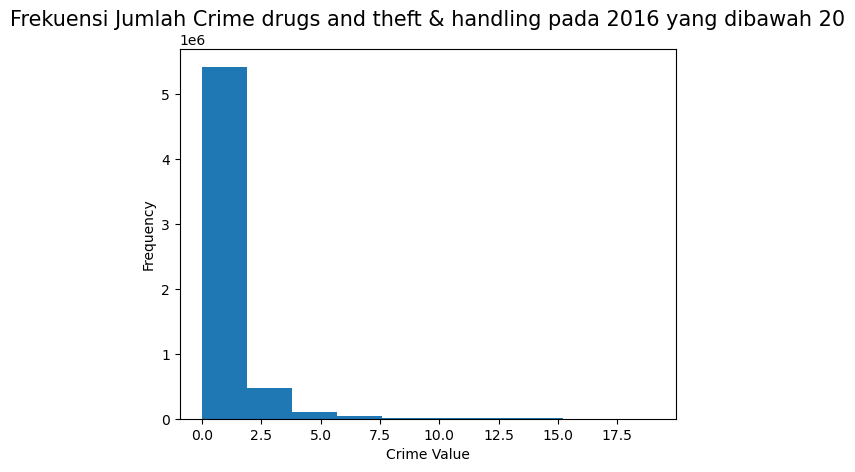

In [37]:
plt.hist(ebc['value'])
plt.title('Frekuensi Jumlah Crime drugs and theft & handling pada 2016 yang dibawah 20', size=15)
plt.xlabel('Crime Value')
plt.ylabel('Frequency')
plt.show()

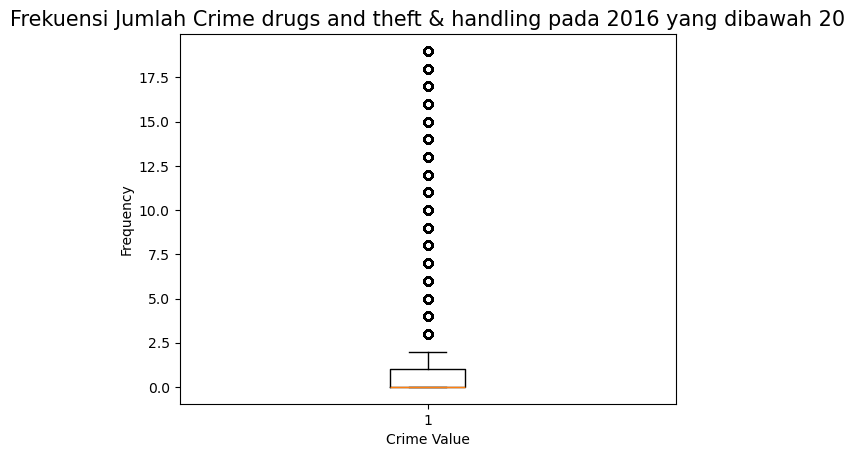

In [38]:
#menggunakan data yang sama dengan visualisasi boxplot untuk melihat persebaran data
plt.boxplot(ebc['value'])
plt.title('Frekuensi Jumlah Crime drugs and theft & handling pada 2016 yang dibawah 20', size=15)
plt.xlabel('Crime Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#terlihat bahwa banyak sekali outlier